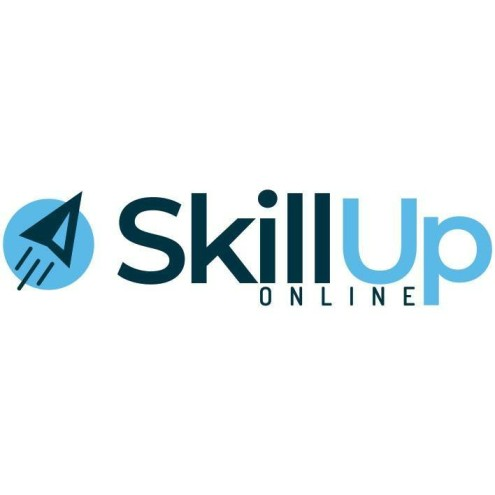

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [3]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Importa y organiza el dataset

In [4]:
# Organizar los datos en un dataframe
data = pd.read_csv('H:\\Curso IBM sobre IA\\Archivos para Data Science\\creditcard.csv')
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

### Limpia los datos

a. Valores perdidos

In [5]:
data.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [6]:
data.drop_duplicates(inplace=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [7]:
# Calcula el porcentaje de transacciones fraudulentas
porcentaje_fraudulentas = (sum((data['Class'] == 1)) / len(data)) * 100
# Muestra el porcentaje de transacciones fraudulentas
print("El porcentaje de transacciones fraudulentas es:",porcentaje_fraudulentas, "%")

El porcentaje de transacciones fraudulentas es: 0.1667101358352777 %


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [8]:
# Calcula el importe medio de las transacciones fraudulentas
# Filtra las transacciones fraudulentas (donde Class == 1)
datos_fraudulentos = data[data['Class'] == 1]

# Calcula el importe medio de las transacciones fraudulentas
media_amount_fruadulentos = datos_fraudulentos['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas
print(f"El importe medio de las transacciones fraudulentas es: {media_amount_fruadulentos}")

El importe medio de las transacciones fraudulentas es: 123.87186046511628


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

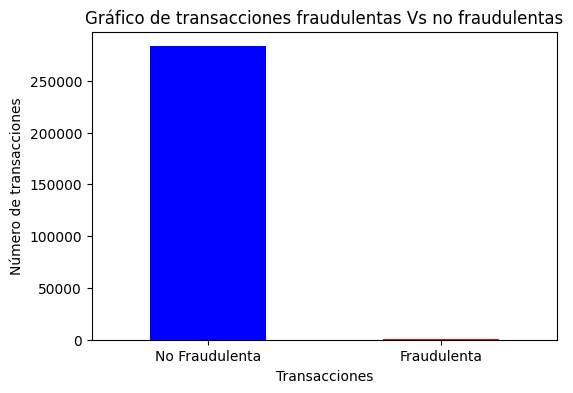

In [9]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
transacciones = data['Class'].value_counts()

transacciones_fraudulentas = transacciones.get(1, 0)
transacciones_no_fraudulentas = transacciones.get(0, 0)



# Muestra la distribución de las transacciones fraudulentas con respecto de las no fraudulentas
plt.figure(figsize=(6, 4))
transacciones.plot(kind='bar', color=['blue', 'red'])

plt.title('Gráfico de transacciones fraudulentas Vs no fraudulentas')
plt.xlabel('Transacciones')
plt.ylabel('Número de transacciones')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'], rotation=0)

plt.show()



<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


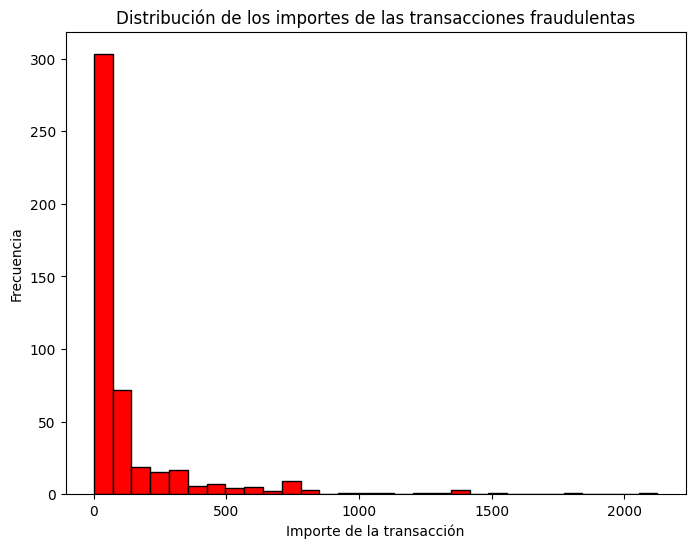

In [10]:
# Separa los datos de transacciones fraudulentas
transacciones_fraudulentas = data[data['Class'] == 1]
transacciones_no_fraudulentas = data[data['Class'] == 1]

# Muestra la distribución de los importes de las transacciones fraudulentas
plt.figure(figsize=(8, 6))
plt.hist(transacciones_fraudulentas['Amount'], bins=30, color='red', edgecolor='black')

plt.title('Distribución de los importes de las transacciones fraudulentas')
plt.xlabel('Importe de la transacción')
plt.ylabel('Frecuencia')

plt.show()


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [12]:
X = data.drop('Class', axis=1)
y = data['Class']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

In [18]:
# Importar librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [19]:
models = {
    "Regresión Logística": LogisticRegression(),
    "SVM": SVC(),
    "Árbol de Decisión": DecisionTreeClassifier()
}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    

    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Mostrar resultados
    print(f"\n{model_name} - Resultados:")
    print(f"Precisión: {accuracy:.4f}")
    print("Reporte de clasificación:")
    print(report)
    print("Matriz de confusión:")
    print(cm)


Regresión Logística - Resultados:
Precisión: 0.9990
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.70      0.63      0.67        90

    accuracy                           1.00     56746
   macro avg       0.85      0.82      0.83     56746
weighted avg       1.00      1.00      1.00     56746

Matriz de confusión:
[[56632    24]
 [   33    57]]

SVM - Resultados:
Precisión: 0.9984
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.00      0.00      0.00        90

    accuracy                           1.00     56746
   macro avg       0.50      0.50      0.50     56746
weighted avg       1.00      1.00      1.00     56746

Matriz de confusión:
[[56656     0]
 [   90     0]]

Árbol de Decisión - Resultados:
Precisión: 0.9991
Reporte de clasificación:
              precision

<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>